In [35]:
from skimage.io import imread
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
import time


In [36]:
rootfolder = '.'

Load the image and rescale it in $[0,1]$

In [37]:
img = imread(f'data/cameraman.png') / 255
img = img[50:200, 50:200]
imsz = img.shape

# patch size
p = 7
h = p // 2

# number of elements in the patch
M = p ** 2

# radius of the search neighborhood
H = 12


Corrupt the image with white gaussian noise

In [38]:
sigma_noise = 20/255
noisy_img = img + np.random.normal(size=imsz) * sigma_noise

Compute the psnr of the noisy input

In [39]:
psnr_noisy = 10 * np.log10(1/ np.square(np.subtract(img, noisy_img)).mean())


Text(0.5, 1.0, 'Noisy image, PSNR = 22.15')

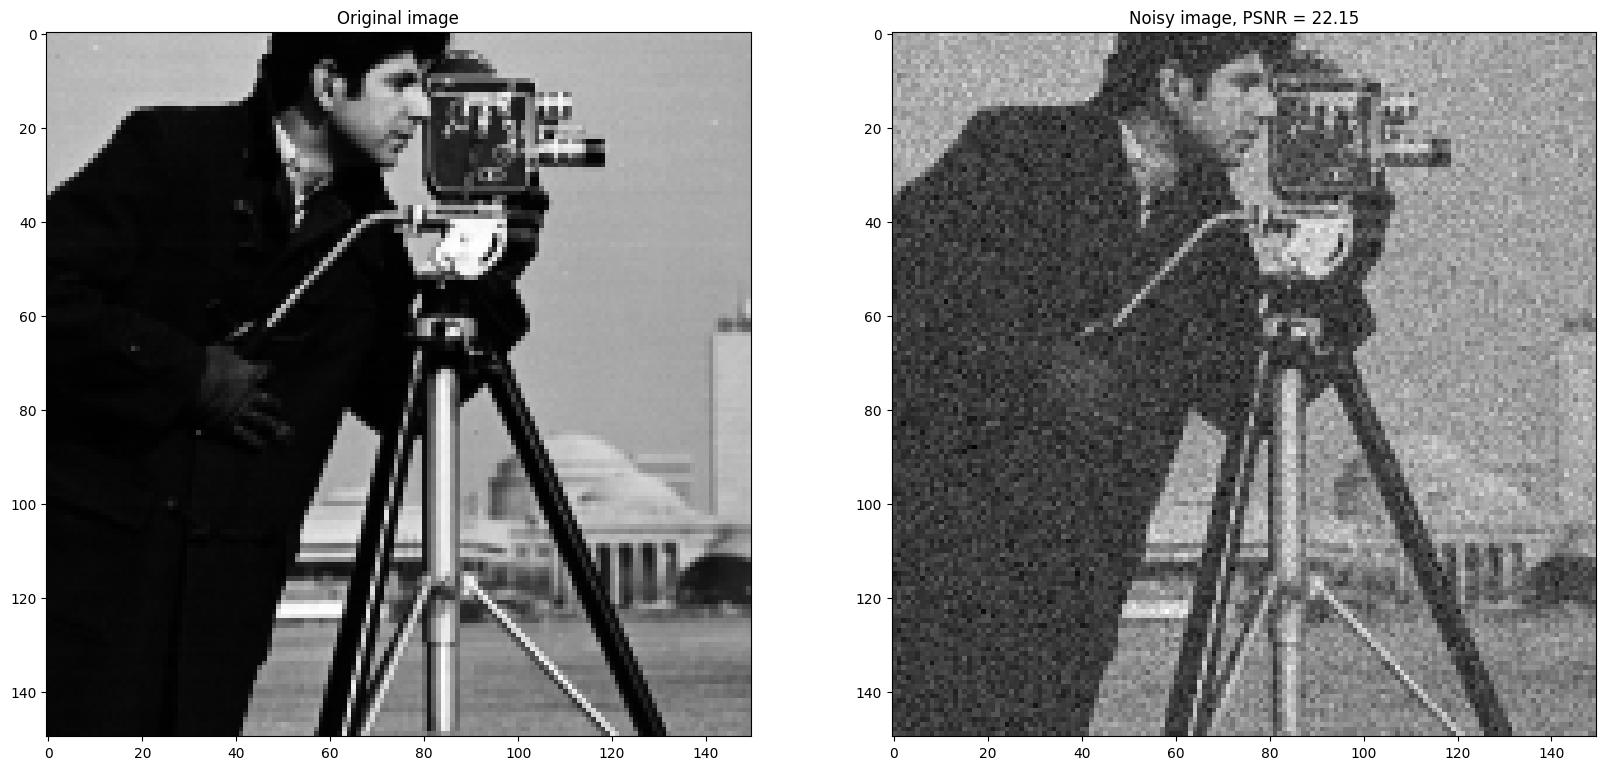

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')

ax[1].imshow(noisy_img, cmap='gray')
ax[1].set_title(f'Noisy image, PSNR = {psnr_noisy:.2f}')


Pixel-based NL-Means
--------------------
Set parameters and initialize the variables

Text(0.5, 1.0, 'Image with patches')

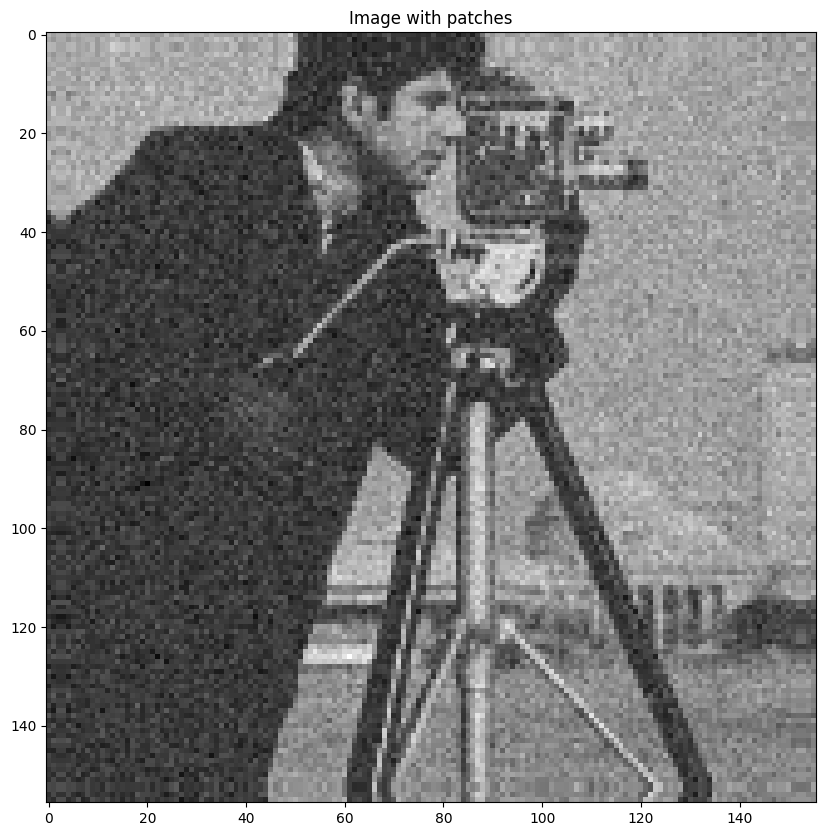

In [41]:
# initialize the estimated image
img_hat = np.zeros_like(img)

# pad the noisy image
img_pad = np.pad(noisy_img, h, mode='symmetric')

plt.figure(figsize=(10, 10))
plt.imshow(img_pad, cmap='gray')
plt.title('Image with patches')


Main loop

In [42]:
for r in range(0, imsz[0]):
    for c in range(0, imsz[1]):
        # extrach the patch from img_pad whose center has the location (i, j) in the noisy image
        s = img_pad[r:r+h, c:c+h]

        # initialize the pixel estimate and the total weights
        w = np.zeros((2*H+1, 2*H+1))
        pixel_hat = 0 # TODO: What is this?
        for i in range(-H, H+1):
            for j in range(-H, H+1):
                # extract the patch
                z = img_pad[r+i:r+i+h, c+j:c+j+h]

                # compute the distance with the reference patch
                d = np.linalg.norm(s - z)**2

                # update the weight and the pixel estimate
                # pixel_hat
                weight = np.exp(-d / (M*sigma_noise**2))

        # estimate the pixel (i, j) as the weighted average of the central pixel of the extracted patches
        # img_hat[i, j]

IndexError: index 3 is out of bounds for axis 0 with size 3

Compute the psnr of the estimated image

NameError: name 'psnr_hat' is not defined

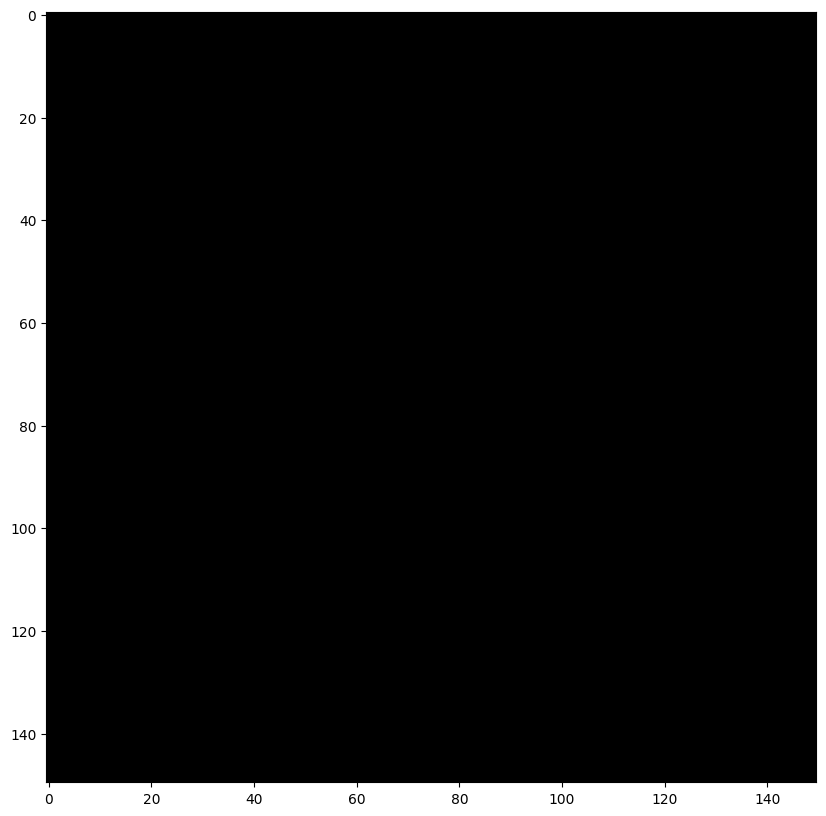

In [ ]:
# psnr_hat =
plt.figure(figsize=(10,10))
plt.imshow(img_hat, cmap='gray')
plt.title(f'Estimated Image,\nPSNR = {psnr_hat:.2f}')
